# MA541 Final Project
### Pranjal Iyer, Mataparthi Joshnanjani, Deepika Vasu Kumar, Kelly Tornetta, Maria Venolia

# Section 1 
## Introduction

The present project falls within the course requirements for Statistical Methods MA 541. 

The broader goal of this project is to implement the topics covered in the Course Syllabus in a real-life situation.  All the groups were given data (sets of numbers) demonstrating the daily ETF return, the daily relative change in the price of the crude oil; the daily relative change in the gold prices, and the daily return of the JPMorgan &Co stock. Firstly, our group needed to obtain the data ( comprised of 1000 values each) and find the mean and standard deviation for each variable. Secondly, our group had to describe the data given, creating histograms and time series plots, as well as scatter plots between different pairs of data. The next step was to determine which distribution the data follow, by performing the appropriate tests. In order to discuss the Central Limit Theorem, we broke our data (the population) into smaller groups (samples) of different sizes each time, and compare their means and standard deviations with the population characteristics. Next, we selected one of the aforementioned samples and constructed confidence intervals for the mean. The sixth part of the project tested our ability to construct and perform hypothesis tests on our data. We also performed hypothesis testing between different columns ( which we treated as samples from different populations). Our group was then expected to fit regression lines to various scatter plots featuring correlations of different columns as well as perform at-test. Part nine of the present project entails evaluating the models we assumed in the previous section. Lastly, our group checked the residuals of the model fitting using various tools available.

In order to achieve the results demonstrated below, our group needed to have the necessary technical background in Python, which is the programming language we decided to work with. The skills we acquired while working on this assignment can be implemented while analysing datasets in various disciplines, rendering us capable of producing accurate and reliable results. 

# Section 2

### Importing Libraries

In [2]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import scipy.stats as st
import random
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import chi2_contingency
from sklearn import linear_model
from scipy.stats import norm

## Part 1: Meet the Data

In [3]:
data=pd.read_excel('541data.xlsx')
data


,Close_ETF,oil,gold,JPM
0,97.349998,0.039242,0.004668,0.032258
1,97.750000,0.001953,-0.001366,-0.002948
2,99.160004,-0.031514,-0.007937,0.025724
3,99.650002,0.034552,0.014621,0.011819
4,99.260002,0.013619,-0.011419,0.000855
...,...,...,...,...
995,150.570007,0.009752,0.004634,0.003859
996,151.600006,-0.009341,-0.015325,0.018259
997,151.300003,0.036120,-0.006195,-0.007928
998,152.619995,0.001542,0.005778,-0.000381


### Sample Mean

In [4]:
data.mean(axis=0)

Close_ETF    121.152960
oil            0.001030
gold           0.000663
JPM            0.000530
dtype: float64

### Sample Standard Deviation

In [5]:
data.std(axis = 0)

Close_ETF    12.569790
oil           0.021093
gold          0.011289
JPM           0.011017
dtype: float64

### Sample Correlations

In [6]:
data.corr()

,Close_ETF,oil,gold,JPM
Close_ETF,1.000000,-0.009045,0.022996,0.036807
oil,-0.009045,1.000000,0.235650,-0.120849
gold,0.022996,0.235650,1.000000,0.100170
JPM,0.036807,-0.120849,0.100170,1.000000


## Part 2: Describe your data

### 1) A histogram for each column

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fea8c0af8b0>,
      dtype=object)

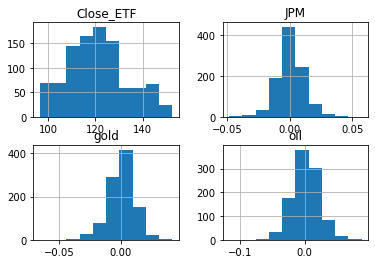

In [7]:
data.hist()

### 2) A time series plot for each column

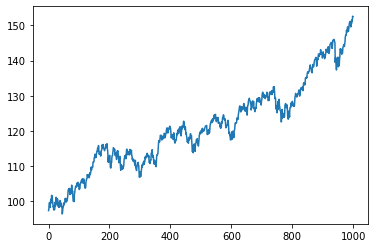

In [8]:
data['Close_ETF'].plot()

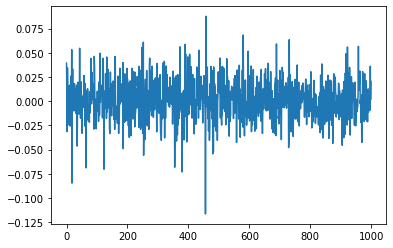

In [9]:
data['oil'].plot()

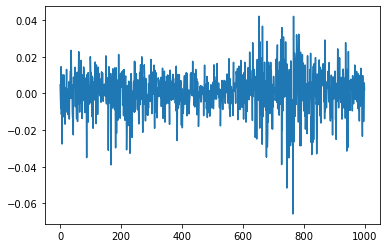

In [10]:
data['gold'].plot()

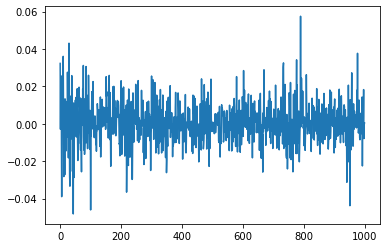

In [11]:
data['JPM'].plot()

### 3) A time series plot for all four columns

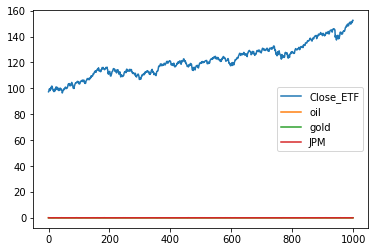

In [12]:
data.plot()

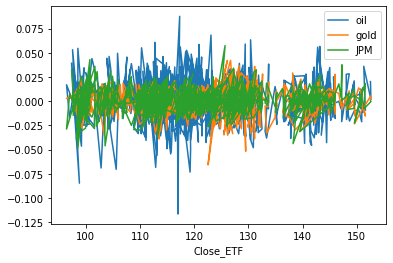

In [13]:
data.plot('Close_ETF')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fea8cd033a0>,
      dtype=object)

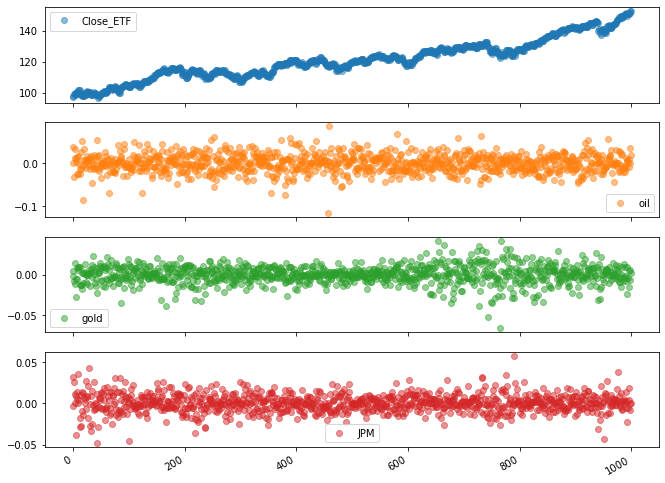

In [14]:
df_columns=['Close_ETF','oil','gold','JPM']
data[df_columns].plot(marker = 'o', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)

### Three scatter plots to describe the relationships between:
- the ETF column and the OIL column
- the ETF column and the GOLD column
- the ETF column and the JPM column

relationship between the ETF column and the OIL column

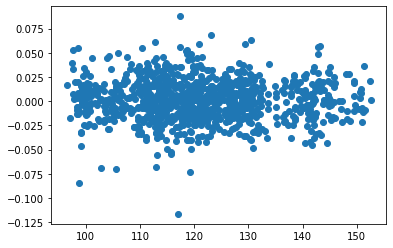

In [15]:
plt.scatter(data['Close_ETF'],data['oil'])


relationship between the ETF column and the GOLD column

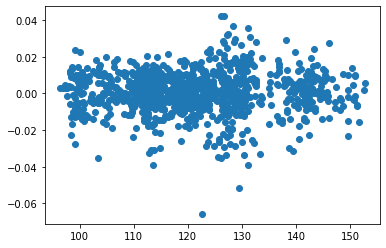

In [16]:
plt.scatter(data['Close_ETF'],data['gold'])

relationship between the ETF column and the JPM column

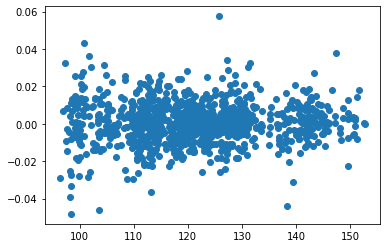

In [17]:
plt.scatter(data['Close_ETF'],data['JPM'])

## Part 3:  What distribution does your data follow? 

#### Based on the histogram of all the 4 columns in the part 2, we propose an null hypothesis that all four columns follow normal distribution.
#### We are verifying the proposed null hypothesis using Kolmogorov-Smirnov test


In [18]:
for i in data:
    D, p = st.kstest(data[i], 'norm')
    print("----",i,"----")
    print("statistic",D,"p value",p)
    if p < 0.05:
        print("Reject null hypothesis")
    else:
        print("cannot reject null hypothesis")

---- Close_ETF ----
statistic 1.0 p value 0.0
Reject null hypothesis
---- oil ----
statistic 0.4727185265212217 p value 1.2565304659417615e-205
Reject null hypothesis
---- gold ----
statistic 0.48333847934283236 p value 1.4922487931964242e-215
Reject null hypothesis
---- JPM ----
statistic 0.4829776270752645 p value 3.278870501508125e-215
Reject null hypothesis


In [19]:
def get_best_distribution(data,i):
    dist_names =["norm", "exponweib",'chi2', "weibull_max", "weibull_min", "pareto", "gamma","uniform"]
    dist_results = []
    params = {}
    print('\n------ FITTING FOR',i, '------')
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("\nBest fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]), end = '\n')

    return best_dist, best_p, params[best_dist]
for i in data:
    data2=data[i]
    get_best_distribution(data2,i)


------ FITTING FOR Close_ETF ------
p value for norm = 0.012378235790052549
p value for exponweib = 0.0
p value for chi2 = 0.09350075446031259
p value for weibull_max = 0.0
p value for weibull_min = 0.0


/Users/kellytornetta/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


p value for pareto = 9.630631189858051e-70
p value for gamma = 0.09350087422158548
p value for uniform = 1.3588459938650208e-35

Best fitting distribution: gamma
Best p value: 0.09350087422158548
Parameters for the best fit: (17.101305733605358, 68.8270937833004, 3.0597585194978345)

------ FITTING FOR oil ------
p value for norm = 0.31363093828069744
p value for exponweib = 0.4363862500005141
p value for chi2 = 0.015271661237016173
p value for weibull_max = 0.008890788415735007
p value for weibull_min = 3.0355181814053017e-170
p value for pareto = 2.1163434391662974e-178
p value for gamma = 0.24430481052697117
p value for uniform = 1.4689320004258727e-118

Best fitting distribution: exponweib
Best p value: 0.4363862500005141
Parameters for the best fit: (8.238847365866478, 19.53161607167032, -0.9284949994146118, 0.886835231387808)

------ FITTING FOR gold ------
p value for norm = 0.0005195120080268338
p value for exponweib = 2.428642577926275e-06
p value for chi2 = 2.5014185849827063

## Part 4: Break your data into small groups and let them discuss the importance of the Central Limit Theorem 

### 1) Calculate the mean $\mu_x$ and the standard deviation $\sigma_x$ of the population for Close_ETF column

In [20]:
print("mean of Close_ETF is ",data['Close_ETF'].mean(axis=0))
print("Variance of Close_ETF is ", data['Close_ETF'].var(axis=0))

mean of Close_ETF is  121.1529600120001
Variance of Close_ETF is  157.9996285155727


### 2) Break the population into 50 groups sequentially and each group includes 20 values

In [21]:
n = 20  
list_df = [data['Close_ETF'][i:i+n] for i in range(0,data['Close_ETF'].shape[0],n)]

#m = 100
#list_df2 = [data['Close_ETF'][i:i+m] for i in range(0,data['Close_ETF'].shape[0],m)]

### 3) Calculate the sample mean $\bar{x}$ of each group. Draw a histogram of all the sample means. Comment on the distribution of these sample means, i.e.,  use the histogram to assess the normality of the data consisting of these sample means.

Subset- 0 mean: 99.32100080000001 std: 1.3477861857625157
Subset- 1 mean: 99.55399974999999 std: 0.9734236487804454
Subset- 2 mean: 99.15400055 std: 1.1663949758054768
Subset- 3 mean: 102.5505004 std: 1.197068497624637
Subset- 4 mean: 103.29199994999999 std: 1.900506581000237
Subset- 5 mean: 105.09350015 std: 0.9917416980955253
Subset- 6 mean: 106.75099975 std: 1.3234922350816254
Subset- 7 mean: 111.6580009 std: 1.6567577508034028
Subset- 8 mean: 114.49950014999999 std: 0.9780400729897619
Subset- 9 mean: 114.40050045000001 std: 1.6315232312996577
Subset- 10 mean: 112.7764996 std: 1.8721058419256784
Subset- 11 mean: 112.28599979999998 std: 1.6436464536618323
Subset- 12 mean: 111.80899930000001 std: 1.9264528277326336
Subset- 13 mean: 113.27149915 std: 0.995162590552988
Subset- 14 mean: 109.9474991 std: 1.3811887864039023
Subset- 15 mean: 110.14300039999998 std: 1.6902472203499928
Subset- 16 mean: 112.53550035 std: 0.9904574648299636
Subset- 17 mean: 112.0754997 std: 1.3560064055522165
S

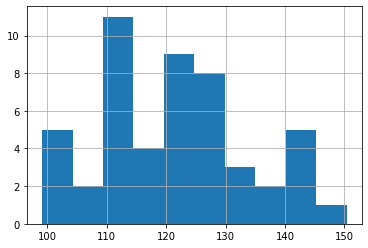

In [22]:
Subset1=pd.DataFrame()
for i in range(0,50):
    print("Subset-",i, 'mean:', st.describe(list_df[i]).mean, 'std:', np.sqrt(st.describe(list_df[i]).variance))
#for i in range(0,50):
#    Subset1[i]=list_df[i].values
#Subset1.hist(figsize=(50,20))
Subset1["mean"]=[st.describe(list_df[i]).mean for i in range(0,50)]
Subset1["mean"].hist()



#### The histogram is scattered all over and does not have a definite pattern as the data set is sequentially  generated.


### 4) Calculate the mean $\mu_{\bar{x}}$ and the standard deviation $\sigma_{\bar{x}}$ of the data including these sample means. Make a comparison between $\mu_x$ and $\mu_{\bar{x}}$, between $\frac{\sigma_x}{\sqrt{n}}$ and $\sigma_x$. Here, $𝑛$ is the number of sample means calculated from Item 3) above.



In [23]:
#S_mean=sum(Subset1.mean(axis=0))/50
S_mean=np.mean(Subset1["mean"])
print("mean of data including Sample mean",S_mean)
S_std=np.std(Subset1["mean"])
print("std of data including Sample std",S_std)
P_mean=data['Close_ETF'].mean(axis=0)
#print(P_mean==S_mean)
print("Result by comparing mean of poplulation and sample means is",round(P_mean, 10)==round(S_mean, 10))
#number of sample means is 50
P_Var=data['Close_ETF'].std()/np.sqrt(50)
print("P_var",data['Close_ETF'].std())
print("P_Var/sqrt(n)",P_Var)
print("S_Var",(np.std(Subset1,axis=0)))
print("Result by comparing variance of poplulation and sample means is",P_Var==S_std)

mean of data including Sample mean 121.15296001200001
std of data including Sample std 12.489175897769009
Result by comparing mean of poplulation and sample means is True
P_var 12.569790313110744
P_Var/sqrt(n) 1.7776367936987165
S_Var mean    12.489176
dtype: float64
Result by comparing variance of poplulation and sample means is False


#### We have compared the $\mu_x$ and $\mu_{\bar{x}}$,  $\frac{\sigma_x}{\sqrt{n}}$ and $\sigma_x$

### 5) Are the results from Items 3) and 4) consistent with the Central Limit Theorem? Why?

#### The results are not consistent with the central limit theorem. $\mu_x$ and $\mu_{\bar{x}}$ is equal, $\frac{\sigma_x}{\sqrt{n}}$ and $\sigma_x$ are not equal but relatively  closer but the data sampling is biased(samples are sequentially generated).

### 6) Break the population into 10 groups sequentially and each group includes 100 values.

In [24]:
m = 100
list_df2 = [data['Close_ETF'][i:i+m] for i in range(0,data['Close_ETF'].shape[0],m)]

### 7) Repeat Items 3) ~ 5)

Subset- 0 mean: 100.77430028999999 std: 2.221623136337517
Subset- 1 mean: 110.48050028 std: 4.131127235768284
Subset- 2 mean: 112.01809938999999 std: 1.94489157815905
Subset- 3 mean: 114.51720014 std: 3.9549155346800284
Subset- 4 mean: 118.40030004 std: 1.959404371561254
Subset- 5 mean: 121.67680030000001 std: 1.7048555323507852
Subset- 6 mean: 125.78560011000002 std: 3.0650192299520627
Subset- 7 mean: 128.01269998 std: 2.5946657083134967
Subset- 8 mean: 135.39209964 std: 4.688539593834637
Subset- 9 mean: 144.47199995 std: 3.682976010286067


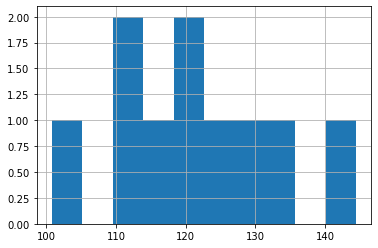

In [25]:
Subset2=pd.DataFrame()
for i in range(0,10):
    print("Subset-",i, 'mean:', st.describe(list_df2[i]).mean, 'std:', np.sqrt(st.describe(list_df2[i]).variance))
Subset2["mean"]=[st.describe(list_df2[i]).mean for i in range(0,10)]
Subset2["mean"].hist()


#### We have generated sample mean for each group
#### The histogram does not have definite pattern as the samples been sequentially generated.

In [26]:
#S_mean=sum(Subset1.mean(axis=0))/50
S_mean2=np.mean(Subset2["mean"])
print("mean of data including Sample mean",S_mean2)
S_std2=np.std(Subset2["mean"])
print("std of data including Sample std",S_std2)
P_mean2=data['Close_ETF'].mean(axis=0)
#print(P_mean==S_mean)
print("Result by comparing mean of poplulation and sample means is",round(P_mean2, 10)==round(S_mean2, 10))
#number of sample means is 10
P_Var2=data['Close_ETF'].std()/np.sqrt(10)
print("P_var",data['Close_ETF'].std())
print("P_Var/sqrt(n)",P_Var2)
print("S_Var",(np.std(Subset2,axis=0)))
print("Result by comparing variance of poplulation and sample means is",P_Var2==S_std2)

mean of data including Sample mean 121.152960012
std of data including Sample std 12.163756860892589
Result by comparing mean of poplulation and sample means is True
P_var 12.569790313110744
P_Var/sqrt(n) 3.9749167100151
S_Var mean    12.163757
dtype: float64
Result by comparing variance of poplulation and sample means is False


#### The results are not consistent with the central limit theorem. Though $\mu_x$ and $\mu_{\bar{x}}$ is equal, $\frac{\sigma_x}{\sqrt{n}}$ and $\sigma_x$ are relatively  the same, the data sampling is biased as the data set is sequentially  generated.

### 8) Generate 50 simple randomsamples or groups (with replacement) from the population. The size of each sample is 20, i.e., each group includes 20 values.

In [27]:
n=20 
RSubset=[np.random.choice(data['Close_ETF'],n) for i in range(0,50)]  

### 9) Repeat Items 3) ~ 5)

Subset- 0 119.50450015000001
Subset- 1 115.93199995000002
Subset- 2 125.04249985000001
Subset- 3 117.6764991
Subset- 4 118.42200019999999
Subset- 5 128.7440003
Subset- 6 124.28850059999999
Subset- 7 120.08499979999999
Subset- 8 122.33500009999997
Subset- 9 120.90749935000001
Subset- 10 123.3325007
Subset- 11 122.8424988
Subset- 12 118.36999995000001
Subset- 13 118.5189999
Subset- 14 121.37899965
Subset- 15 123.26449925
Subset- 16 117.85750010000001
Subset- 17 124.42349895
Subset- 18 116.3855008
Subset- 19 125.4949981
Subset- 20 123.2855
Subset- 21 119.1749996
Subset- 22 118.63099964999999
Subset- 23 121.32500009999998
Subset- 24 120.9880007
Subset- 25 116.52099994999999
Subset- 26 121.3615005
Subset- 27 118.09400025
Subset- 28 121.751999
Subset- 29 119.744999
Subset- 30 121.39749945000001
Subset- 31 121.52000020000003
Subset- 32 126.37849889999998
Subset- 33 119.25600085
Subset- 34 122.79450004999998
Subset- 35 121.75449945
Subset- 36 126.34549900000002
Subset- 37 121.24299925
Subset- 

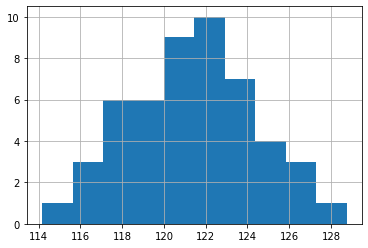

In [28]:
for i in range(0,len(RSubset)):
    print("Subset-",i, st.describe(RSubset[i]).mean)
RSubset1=pd.DataFrame()
RSubset2=pd.DataFrame()
RSubset1=[st.describe(RSubset[i]).mean for i in range(0,len(RSubset))]
RSubset2["mean"]=RSubset1
RSubset2["mean"].hist(bins=10)

#### We have generated sample mean for each group
#### The histogram approximately tends to normal distribution. The distribution of the sample means are tightly clustered towards the population because of the large sample sizes.

In [29]:
RS_mean=np.mean(RSubset2["mean"])
RS_std=np.std(RSubset2["mean"])
print("Sample mean",RS_mean,"Sample Std",RS_std)
P_mean=data['Close_ETF'].mean(axis=0)
#print(P_mean==S_mean)
print("Result by comparing mean of poplulation and sample means",round(P_mean, 10)==round(RS_mean, 10))
#number of sample means is 50
P_Var=data['Close_ETF'].std()/np.sqrt(50)
print("P_var",data['Close_ETF'].std())
#standard error
print("P_Var/sqrt(n)",P_Var)
print("RS_Var",np.var(RSubset2["mean"]))
print("Result by comparing variance of poplulation and sample means",P_Var==RS_std)

Sample mean 121.38818980600004 Sample Std 3.002373096675376
Result by comparing mean of poplulation and sample means False
P_var 12.569790313110744
P_Var/sqrt(n) 1.7776367936987165
RS_Var 9.014244211640088
Result by comparing variance of poplulation and sample means False


#### The results are relatively consistent with the central limit theorem. $\mu_x$ and $\mu_{\bar{x}}$ is equal, $\frac{\sigma_x}{\sqrt{n}}$ and $\sigma_x$ are not equal but relatively  closer. As the data sampling is unbiased(samples are randomly generated) the distributiion of sample mean tends toward normal distribution.

### 10) Generate 10 simple randomsamples or groups (with replacement) from the population. The size of each sample is 100, i.e., each group includes 100 values.

In [30]:
n=100
RSubset3=[np.random.choice(data['Close_ETF'],n) for i in range(0,10)]  

### 11) Repeat Items 3) ~ 5)

Subset- 0 119.91550043000001
Subset- 1 119.94609994999999
Subset- 2 120.71869981000002
Subset- 3 118.88840001999999
Subset- 4 120.8445002
Subset- 5 119.49820007000002
Subset- 6 121.16989995999997
Subset- 7 120.83859992
Subset- 8 119.83689982
Subset- 9 120.51369946999999


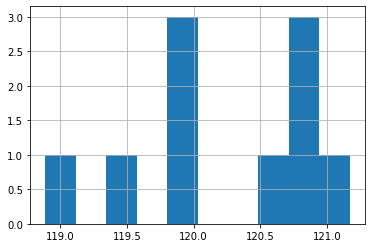

In [31]:
#right now this samples with replacement for each individual sample
#10 samples of size 100

for i in range(0,len(RSubset3)):
    print("Subset-",i, st.describe(RSubset3[i]).mean)
RSubset4=pd.DataFrame()
RSubset5=pd.DataFrame()
RSubset4=[st.describe(RSubset3[i]).mean for i in range(0,len(RSubset3))]
RSubset5["mean"]=RSubset4
RSubset5["mean"].hist()


#### Generated mean for each group
#### As noticed in the histogram, as the number of samples are fewer, the samplig distribution is much broader and sample means are further away from the population mean.

In [32]:
RS_mean3=np.mean(RSubset5["mean"])
RS_std3=np.std(RSubset5["mean"])
print("Sample mean",RS_mean3,"Sample Std",RS_std3)
P_mean3=data['Close_ETF'].mean(axis=0)
#print(P_mean==S_mean)
print("Result by comparing mean of poplulation and sample means",round(P_mean3, 10)==round(RS_mean3, 10))
#number of sample means is 50
P_Var3=data['Close_ETF'].std()/np.sqrt(10)
print("P_var",data['Close_ETF'].std())
#standard error
print("P_Var/sqrt(n)",P_Var3)
print("RS_Var",np.var(RSubset5["mean"]))
print("Result by comparing variance of poplulation and sample means",P_Var3==RS_std3)

Sample mean 120.217049965 Sample Std 0.6795962599999726
Result by comparing mean of poplulation and sample means False
P_var 12.569790313110744
P_Var/sqrt(n) 3.9749167100151
RS_Var 0.46185107660595043
Result by comparing variance of poplulation and sample means False


#### The results are less consistent with the central limit theorem. $\mu_x$ and $\mu_{\bar{x}}$ has a slight difference, $\frac{\sigma_x}{\sqrt{n}}$ and $\sigma_x$ are not equal but relatively  closer. Though the data sampling is unbiased(samples are randomly generated), the distributiion of sample mean is broader and estimates less precisely.

### 12) In Part 3 of the project, you have figured out the distribution of the population (the entire ETF column). Does this information have any impact on the distribution of the sample mean(s)? Explain your answer.

#### No. In central limit theorem, the distribution of sample means will appoximate to normal distribution given sufficiently large sample sizes regardless of the distribution of the popluation mean.
#### The central limit theorem states that if you have a population with mean μ and standard deviation σ and take sufficiently large random samples from the population with replacement , then the distribution of the sample means will be approximately normally distributed.

## Part 5: Construct a confidence interval with your data

### 1) Pick up one of the 10 simple random samples you generated in Step 10) of Part 4, construct an appropriate 95% confidence interval of the mean $\mu$.

In [33]:
confidence_level = 0.95
degrees_freedom = RSubset3[0].size - 1
sample_mean1 = np.mean(RSubset3[0])
sample_standard_error = st.sem(RSubset3[0])

confidence_interval = st.t.interval(confidence_level, degrees_freedom, sample_mean1, sample_standard_error)

print("Confidence level of 95% with mean mu is",confidence_interval)

Confidence level of 95% with mean mu is (117.272446551875, 122.55855430812501)


#### We have constructed Confidence Interval of 95% from sample [0] of 10 random samples generated

### 2) Pick up one of the 50 simple random samples you generated in Step 8) of Part 4, construct an appropriate 95% confidence interval of the mean $\mu$.

In [34]:
confidence_level = 0.95
degrees_freedom = RSubset[0].size - 1
sample_mean2 = np.mean(RSubset[0])
sample_standard_error = st.sem(RSubset[0])

confidence_interval = st.t.interval(confidence_level, degrees_freedom, sample_mean1, sample_standard_error)

print("Confidence level of 95% with mean mu is",confidence_interval)

Confidence level of 95% with mean mu is (114.6790452437892, 125.15195561621081)


#### We have constructed Confidence Interval of 95% from sample [0] of 50 random samples generated

### 3) In Part 1, you have calculatedthe mean $\mu$ of the population (the entire ETF column) using Excel function.Do the two intervals from 1) and 2) above include (thetrue value of) the mean $\mu$? Which one is more accurate? Why?

#### Two intervals from 5.1 and 5.2 above include (the true value of) the mean 𝜇. Part 1 gives us more accurate results.
The larger our sample, the more certain we can be that their results reflect the population. 

## Part 6: Form a hypothesis and test it with your data 

### 1) Use the same sample you picked up in Step 1) of Part 5 to test $H_0: \mu = 100$ vs. $H_a: \mu \neq 100$ at the significance level 0.05. What’s your conclusion? 

In [36]:
tset, pval = st.ttest_1samp(RSubset3[0], 100)
print("sample_mean is",sample_mean1)
print("p-value",pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
  print("we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

sample_mean is 119.91550043000001
p-value 3.890765937302737e-27
we are rejecting null hypothesis


#### We reject the null hypothesis and conclude that $\mu \neq 100$

### 2) Use the same sample you picked up in Step 2) of Part 5 to test $H_0: \mu = 100$ vs. $H_a: \mu \neq 100$ at the significance level 0.05. What’s your conclusion?

In [37]:
tset, pval = st.ttest_1samp(RSubset[0], 100)
print("sample_mean is",sample_mean2)
print("p-value",pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
  print("we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

sample_mean is 119.50450015000001
p-value 2.4544281249031406e-07
we are rejecting null hypothesis


#### We reject the null hypothesis and conclude that $\mu \neq 100$

### 3) Use the same sample you picked up in Step 2) of Part 5 to test $H_0: \sigma = 15$ vs. $H_a: \sigma \neq 15$ at the significance level 0.05. What’s your conclusion?

#### We use chi-square test for single variance.

#### The test statistic is $\frac{(n-1)s^2}{\sigma^2}$ (where s is the sample std and sigma is the hypothesized std)

#### In step 5.1, n=100

#### test statistic = 99*11.59832/152 = 59.1890

#### From chi-square table, value corresponding to 0.05 & 99 degrees of freedom should be between 74.222 and 129.561

#### Since the test static is not in this range, we reject the null hypothesis.

### 4) Use the same sample you picked up in Step 2) of Part 5 to test $H_0: \sigma = 15$ vs. $H_a: \sigma < 15$ at the significance level 0.05. What’s your conclusion?

#### We use chi-square test for single variance.

#### The test statistic is $\frac{(n-1)s^2}{\sigma^2}$ (where s is the sample std and sigma is the hypothesized std)

#### In step 5.2, n=20

#### test statistic = 19*13.9092/152 = 16.3366

#### From chi-square table, value corresponding to 0.05 & 19 degrees of freedom should be between 8.907 and 32.852.  

#### Since the test statistic is in this range, we cannot reject the null hypothesis.


## Part 7: Compare your data with a different data set 


### 1) Consider the entire Gold column as a random sample from the first population, and the entire Oil column as a random sample from the second population. Assuming these two samples bedrawn independently, form a hypothesis and test it to see if the Gold and Oil have equal means in the significance level 0.05.

In [38]:
st.ttest_ind(data['oil'], data['gold'])

Ttest_indResult(statistic=0.48536661382360874, pvalue=0.6274695258306375)

#### Our null hypothesis is that Gold and Oil have equal means with alternate hypothesis that their means are not equal. Our p-value = 0.6275 $\nleq$ 0.05, so we fail to reject the null hypothesis and cannot conclude if they have equal means.

### 2) Subtract the entire Gold column from the entire Oil column and generate a sample of differences. Consider this sample as a random sample from the target population of differences between Gold and Oil. Form a hypothesis and test it to see if the Gold and Oil have equal means in the significance level 0.05.

In [39]:
st.ttest_1samp(data['oil'] - data['gold'], 0.0)

Ttest_1sampResult(statistic=0.5413309278514735, pvalue=0.5884002009146817)

#### Our null hypothesis is that Gold-Oil has a mean of 0. Our alternate hypothesis is that the mean is not 0. The p-value is 0.5884 $\nleq$ 0.05, so. we fail. to reject the null nypothesis and cannot conclude if the sample of differences has mean 0. Thus we cannot conclude if Gold and Oil have equal means.

### 3) Consider the entire Gold column as a random sample from the first population,and the entire Oil column as a random sample from the second population. Assuming these two samples be drawn independently, form a hypothesis and test it to see if the Gold and Oil have equal standard deviationsin the significance level 0.05.

In [40]:
scaler = MinMaxScaler()
chi2, p, dof, expected = st.chi2_contingency(scaler.fit_transform(data[['oil', 'gold']]))
print("test statistic:", chi2, "\np-value", p)

test statistic: 15.11262438695904 
p-value 1.0


#### Our null hypothesis is that Gold and Oil have equal standard deviations with alternate hypothesis that their standard deviations are not equal. Our p-value is 1.0 $\nleq$ 0.05,  so we fail to reject the null hypothesis and cannot conclude if they have equal standard deviations.

## Part 8: fitting the line to the data

### Consider the data including the ETT column and Gold column only. Using any software:

### 1) Draw a scatter plot of ETF (Y) vs. Gold(X). Is there any linear relationship between them which can be observed from the scatter plot?

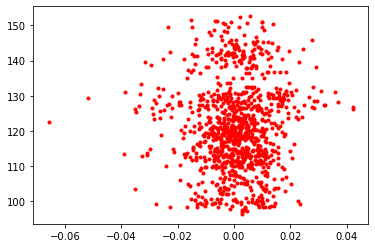

In [43]:
plt.plot(data['gold'], data['Close_ETF'], 'r.')
plt.show()

There doesn’t appear to be any linear relationship

### 2) Calculate the coefficient of correlation between ETF and Gold and interpret it.

In [45]:
corr, _ = st.pearsonr(data['gold'], data['Close_ETF'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.023


Coefficient of correlation between ETF and Gold
Pearson correlation coefficient = 0.023

Since the coefficient of correlation is much smaller than 1 and closer to 0, there is almost no correlation.


### 3) Fit a regression line (or least squares line, best fitting line) to the scatter plot. What are the intercept and slope of this line? How to interpret them?

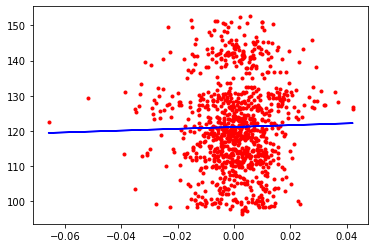

In [49]:
from sklearn.linear_model import LinearRegression
etf = np.array(data.Close_ETF)
oil = np.array(data.oil)
gold = np.array(data.gold)
JPM = np.array(data.JPM)

reg = LinearRegression().fit(gold.reshape([-1,1]), etf.reshape([-1,1]))

# Fit the regression line (OLS - ordinary least squares)
pred = reg.predict(gold.reshape([-1,1]))
plt.plot(gold, etf, 'r.')
plt.plot(gold, pred, 'b')
plt.show()

slope = 25.604
Intercept = 121.1359

Intercept is the value of ETT when the value of Gold is 0.
Slope is the change in ETT value for every 1 value change in Gold.


### 4) Conduct a two-tailed t-test with $H_0: \beta_1 = 0$. What is the P-value of the test? Is the linear relationship between ETF (Y) and Gold (X) significant at the significance level 0.01? Why or why not?

In [50]:
from scipy.stats import linregress

slope, intercept, r, p, se = linregress(gold, etf)

In [51]:
print('slope = ', slope)

print('intercept = ',intercept)

print('Standard Error = ', se)

print('p value = ', p)

slope =  25.604389324427277
intercept =  121.13598849889819
Standard Error =  35.236285000863866
p value =  0.467611780618294


In [52]:
#test statistic
slope/se

0.7266483774835955

𝐻0: 𝛽1 = 0 (i.e. slope is equal to 0)
       𝐻1: 𝛽1 ≠ 0

       Given significance level alpha = 0.01 
       Degrees of freedom = n-2 = 998
  
       So the confidence interval is (-2.581, 2.581) from the t-table 

       Sample slope, b1 = 25.604
     
       Standard error, SE = 35.236

       So test statistic t = b1/SE = 0.7266

       Since t is in the confidence interval, we can’t reject the null hypothesis.

       The p-value can be inferred from the t-table corresponding to 0.7266 for df = 1000  
       or using software.
       p-value is 0.4676. Note that p-value is much higher than the significance      
       level alpha, hence we don’t reject the null hypothesis.


### 5) Suppose that you use the coefficient of determination to assess thequality of this fitting. Is it a good model? Why or why not?

In [53]:
r2 = reg.score(gold.reshape([-1,1]), etf.reshape([-1,1]))
r2

0.0005287962431226312

coefficient of determination = 0.00053
       ,Yes. The most common interpretation of the coefficient of determination is how well
       the regression model fits the observed data. For example, a coefficient of
       determination of 60% shows that 60% of the data fit the regression model.       
       Generally, a higher coefficient indicates a better fit for the model. R squared 
       (coefficient of determination) is a scale invariant measure of fit of regression line 
       unlike the residual sum of squared.


### 6) What are the assumptions you made for this model fitting?

In [54]:
predictions = slope * gold + intercept
residuals = predictions - etf
rse = np.std(residuals)
rse

12.560181639876602

In [55]:
np.mean(residuals)

-9.094947017729283e-15

The assumption made in linear regression is that the residuals are distributed  
independently according to a normal distribution centered around the y value of 
the regression line. The fitted line should minimize the sum of squared errors. So
the mean of the residuals should be equal to zero. And we can compute the 
standard deviation of this normal distribution by the standard deviation of the 
residuals. (which is equal to 12.56)


### 7) Given the daily relative change in the gold price is 0.005127. Calculate the 99% confidence interval of the mean daily ETF return, and the 99% prediction interval of the individual daily ETF return.

In [56]:
x = 0.005127
y = slope*x + intercept
y

121.26726220296453

In [57]:
rse * 2.581

32.417828812521506

In [58]:
(-32.4178 + 121.26726, 32.4178 + 121.26726)

(88.84946, 153.68506)

In [59]:
(-32.4178 + 121.1529, 32.4178 + 121.1529)

(88.7351, 153.5707)

Given the daily relative change in the gold price is x = 0.005127, the predicted value of 
       the ETF can be computed as 𝛽1 x + 𝛽0 
			               = 121.26726

        99% confidence interval?
      
        From the t table, the value corresponding to significance level alpha = 0.01 and degrees
        Of freedom, df = 1000 is equal to 2.581 
	
        Hence the 99% confidence interval for the individual daily ETF return = (-32.4178 + 121.26726, 32.4178 + 121.26726)
		= (88.84946, 153.68506)
       
       

 99% confidence interval for the mean ETF return = 
 			(-32.4178 + 121.1529, 32.4178 + 121.1529)
			= (88.7351, 153.5707)


## Part 9: Does your model predict?

### Consider the data including the ETF, Gold and Oil column. Using any software, fit a multiple linear regression model to the data with the ETF variable as the response. Evaluate your model with adjusted $R^2$. 

In [62]:
etf_close = np.array(data.Close_ETF)
features = data[['oil', 'gold']]

In [63]:
regr = linear_model.LinearRegression()
reg_fit=regr.fit(features, etf_close.reshape([-1,1]))
r2 = reg_fit.score(features, etf_close.reshape([-1,1]))
adj_r2 = 1-((1-r2)*999/997)
adj_r2

-0.0012542162846487237

We fit a multiple linear regression and obtain 𝑅 score = 0.000750
Adjusted 𝑅2 score is given by the equation: 


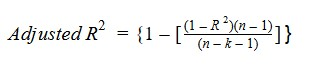

Here, 
• n represents the number of data points in our dataset, n=1000
• k represents the number of independent variables, k=2
• R represents the R-squared values determined by the model.


Hence we obtain, Adjusted 𝑅2 = -0.001254

## Part 10: Checking residuals and model selection

### Calculate the residuals of the model fitting you did inPart 9.Check the four assumptions made for the error terms of the multiple regression model using these residuals (mean 0; constant variance; normality; and the independence).

### Discuss how you may improve the quality of your regression model according to the strategy of model selection.

In [64]:
predictions = reg_fit.predict(features)
residuals =  etf_close.reshape([-1,1]) - predictions

In [65]:
np.mean(residuals)

3.637978807091713e-15

Mean of the Residual = 0

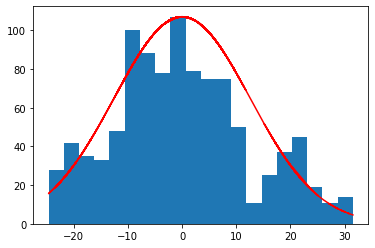

In [66]:
# Assumption 2: Normality of residuals

h = plt.hist(residuals, bins=20)
s = np.std(residuals)
y = norm.pdf(residuals, 0, s)
y = y * max(h[0])/max(y)

plt.plot(residuals, y, 'r')

The histogram of residuals doesn’t exactly follow a normality assumption!

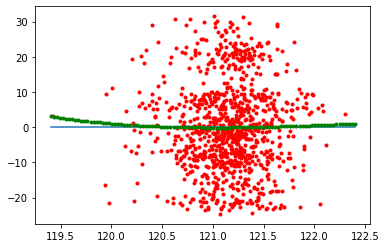

In [67]:
# Assumption 3: constant variance & independence 

plt.plot(predictions, residuals, 'r.')
plt.plot([119.4, 122.4], [0,0])

# fit a polynomial to the data
poly_model = np.poly1d(np.polyfit(predictions.squeeze(1), residuals.squeeze(1), deg=3))
x = np.linspace(119.4, 122.4, 100)
y = poly_model(x)
plt.plot(x, y, 'g.')
plt.show()


As the data is showing no particular pattern or cone shape, we can conclude that the assumption of constant variance is satisfied.
The green curve shows slight curvature above the horizontal line. But the curvature is very less and we can safely assume that independence assumption is also satisfied!

Model selection for multiple regression: 

Model selection in multiple regression is mainly concerned about identifying variables that may not be useful for prediction. This is called variable selection. There are several techniques for variable selection such as backward selection and forward selection, which can also be used for variable selection.


# Section 3

## Discussions or Improvements

Here we will discuss any improvements after hearing feedback!

# References

Throughout completing this we referred to our lecture notes and textbook. In addition we used the documentation for the various Python libraries that we used including: numpy, pandas, matplotlib, scipy, and scikit-learn. 